In [4]:
# Data processing
import numpy as np
import xarray as xr
import iris
import warnings
warnings.filterwarnings('ignore', module='iris')
from pathlib import Path
# Visualization
import cartopy.util
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
## Scientific Parameters
M_air = 28.97 # dry air [kg]
# Convert mass mixing ratio to volume mixing ratio
coeff_c2h6 = (M_air/30.0690)*1e12
coeff_c3h8 = (M_air/44.0956)*1e12
coeff_nc4h10 = (M_air/58.1222)*1e12
coeff_nc5h12 = (M_air/72.1488)*1e12
coeff_ic5h12 = (M_air/72.1488)*1e12
coeff_meono2 = (M_air/77.0394)*1e12
coeff_sbuono2 = (M_air/119.1192)*1e12
coeff_n2peono2 = (M_air/133.1457)*1e12
coeff_n3peono2 = (M_air/133.1457)*1e12
coeff_ipeono2 = (M_air/133.1457)*1e12
coeff_o3 = (M_air/48.00)*1e9
# Plotting parameters
plt.rcParams['mathtext.default'] = 'regular'
savefig = False
str_o3 = '$O_3$'

In [11]:
# Read data
run1 = 'xnvtc'; run2 = 'xnvtg'; run3 = 'xnvtd'
path_to_ukca = Path('../data')
# o3_cb_run1 = iris.load_cube(str(path_to_ukca / run1 / f'{run1}_o3.nc'))*coeff_o3
o3_cb_run2 = iris.load_cube(str(path_to_ukca / run2 / f'{run2}_o3.nc'))*coeff_o3
o3_cb_run3 = iris.load_cube(str(path_to_ukca / run3 / f'{run3}_o3.nc'))*coeff_o3

In [34]:
o3_cb_diff = o3_cb_run3.data - o3_cb_run2.data

In [41]:
cyclic_o3_diff, cyclic_lons = cartopy.util.add_cyclic_point(o3_cb_diff, coord=o3_cb_run2.coord('longitude').points)

/local/mwe14avu/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:3169: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


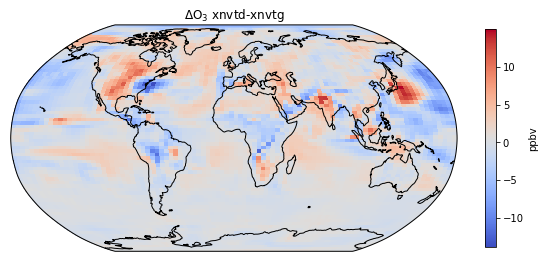

In [43]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0)), facecolor='w')
mp_cf_kwargs = dict(transform=ccrs.PlateCarree(), cmap='coolwarm')
p1 = ax.pcolormesh(cyclic_lons, o3_cb_run2.coord('latitude').points, cyclic_o3_diff[20,0,...], **mp_cf_kwargs);
ax.coastlines();
ax.set_global();
ax.set_title(f'$\Delta${str_o3} {run3}-{run2}');
fig.colorbar(p1, shrink=0.4, label='ppbv');

In [55]:
import ipywidgets as widgets
from ipywidgets import interact

In [57]:
def plot_o3_diff(t):
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0)), facecolor='w')
    mp_cf_kwargs = dict(transform=ccrs.PlateCarree(), cmap='coolwarm')
    p1 = ax.pcolormesh(cyclic_lons, o3_cb_run2.coord('latitude').points, cyclic_o3_diff[t,0,...], **mp_cf_kwargs);
    ax.coastlines();
    ax.set_global();
    ax.set_title(f'$\Delta${str_o3} {run3}-{run2}');
    fig.colorbar(p1, shrink=0.4, label='ppbv');
    plt.show()

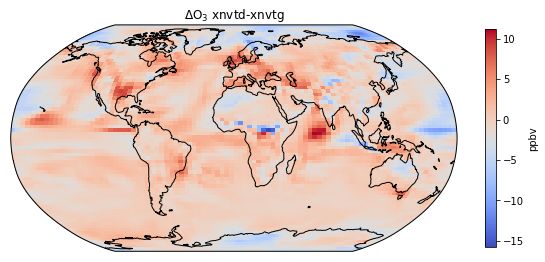

In [59]:
interact(plot_o3_diff, t=widgets.IntSlider(min=0,max=119,step=1));